In [9]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
# ![title](images/pre-image.png)(Honeine and Richard,2011)

<h2>Subestructura óptima</h2>
Recompensa:
$$r_i = \max_{1\leq i\leq n}(p_i+r_{n-i})$$

Implementación simple de arriba hacia abajo (top-down)

In [3]:
def cut_rodR(p, n):
    if n==0:
        return 0
    q = float('-inf')
    for i in range(n):
        #print i
        q = max(q, p[i] + cut_rodR(p, n-1-i))
    return q

In [4]:
p = [1,5,8,9,10,17,17,20,24,30,31,35,38,39,40,47,47,50,54,60,61,65,68,69,70,77,77,80,84,90,91,95,98,99,100,107,107,110,114,120,121,125,128,129,130,137,137,140,144,150]

In [5]:
sol = cut_rodR(p,8)
print (sol)

22


In [13]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time
def timer_analysis1(p,n):
    results = []
    for i in range(1,n):
        tic = time.clock()
        cut_rodR(p,i)
        toc = time.clock()
        results.append((toc-tic))
    return results

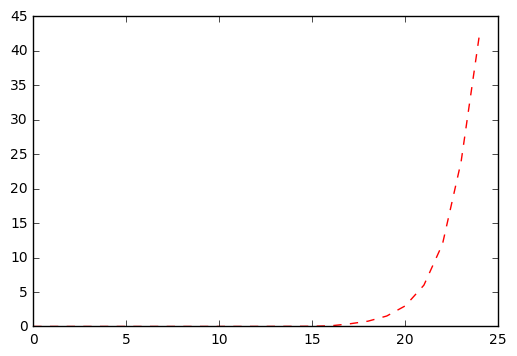

In [10]:
import pylab 
import math
pylab.clf()
i=25
x = np.arange(i)
y = np.array(timer_analysis1(p,i))

pylab.plot(x, y, 'r--')
pylab.show()

$$T(n) = 2^n$$

Implementación de arriba hacia abajo con memorización (memoization)

In [12]:
def memo_cut_rodTD(p, n):
    r = [-1] * (n+1)
    return memo_cut_rodTD_aux(p,n,r)

def memo_cut_rodTD_aux(p,n,r):
    if r[n] >= 0:
        return r[n]
    if n == 0:
        q = 0
    else:
        q = float('-inf')
        for i in range(1,n+1):
            q = max(q, p[i-1]+memo_cut_rodTD_aux(p,n-i,r))
            
    r[n]=q
    return q

In [13]:
sol = memo_cut_rodTD(p,10)
print (sol)

30


In [14]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time
def timer_analysis2(p,n):
    results = []
    for i in range(1,n):
        tic = time.clock()
        memo_cut_rodTD(p,i)
        toc = time.clock()
        results.append((toc-tic))
    return results

Implementación abajo hacia arriba (bottom-up) con memorización

In [5]:
p = [1,5,8,9,10,17,17,20,24,30,31,35,38,39,40,47,47,50,54,60,61,65,68,69,70,77,77,80,84,90,91,95,98,99,100,107,107,110,114,120,121,125,128,129,130,137,137,140,144,150]
n = 4

In [6]:
global arr
global r
def memo_cut_rodBU(p,n):
    global arr
    global r
   
    r[0] = 0
    for j in range(1,n+1):
        q = float('-inf')
        izq=p[j+1]
        der=p[j+1]
        for i in range(1,j+1): 
            
            if p[i-1]+r[j-i]>q:
                q = p[i-1]+r[j-i]
                
                izq=i-1
                der=j-i-1
                
        arr[0,j]=izq
        arr[1,j]=der
        r[j] = q
        

   
    return r[n]

def funcion(p,n):
    global arr
    global r
    r = [0] * (n+1)
    arr=np.zeros((2,n+1))
    print('solucion: ',memo_cut_rodBU(p,n))

   
    x=arr[0,n]
    y=arr[1,n]
    '''arr=arr[:,1:]'''
    print('tam - total')
    rec(arr,int(x),int(y),n,r)



Reconstruir los tamaños

In [11]:
def rec(arr,a,b,n,r):
    
    if a==-1 and b!=-1:
        print (int(b)+1,'  -  ',r[int(b)+1])
        return 
    if a!=-1 and b==-1:
        print (int(a)+1,'  -  ',r[int(a)+1])
        return 
    else:
        m=int(arr[0,a+1])
        j=int(arr[1,a+1])
        rec(arr,m,j,n,r)
        x=int(arr[0,b+1])
        y=int(arr[1,b+1])
        rec(arr,x,y,n,r)

In [12]:
sol = funcion(p,7)

solucion:  18
tam - total
1   -   1
6   -   17


In [35]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time
def timer_analysis3(p,n):
    results = []
    for i in range(1,n):
        tic = time.clock()
        funcion(p,i)
        toc = time.clock()
        results.append((toc-tic))
    return results

solucion:  0
tam - total
solucion:  1
tam - total
solucion:  5
tam - total
2   -   5
solucion:  8
tam - total
3   -   8
solucion:  10
tam - total
2   -   5
2   -   5
solucion:  13
tam - total
2   -   5
3   -   8
solucion:  17
tam - total
6   -   17
solucion:  18
tam - total
solucion:  22
tam - total
2   -   5
6   -   17
solucion:  25
tam - total
3   -   8
6   -   17
solucion:  30
tam - total
10   -   30
solucion:  31
tam - total
solucion:  35
tam - total
2   -   5
10   -   30
solucion:  38
tam - total
3   -   8
10   -   30
solucion:  40
tam - total
2   -   5
2   -   5
10   -   30


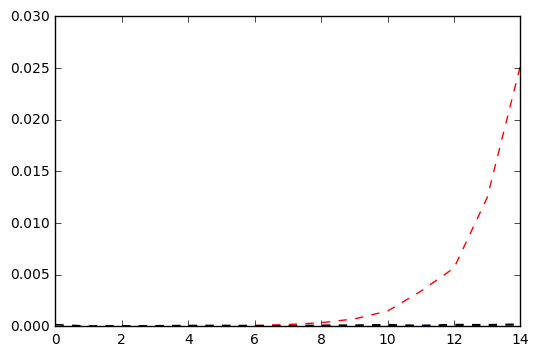

In [43]:
import pylab 
import math
pylab.clf()
i=15
x = np.arange(1,i)
y = np.array(timer_analysis1(p,i))

a = np.arange(1,i)
b = np.array(timer_analysis2(p,i))

c = np.arange(1,i)
d = np.array(timer_analysis3(p,i))

pylab.plot(x, y, 'r--',a,b,'b--',c,d,'k--')
pylab.show()